In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def calculate_nyquist_sampling(
    wavelength: int, n: float = 1.158, numerical_aperture: float = 1.35
) -> tuple[int, int]:
    """
    Description
    -----------
    Calculate the Nyquist sampling rates (delta_x and delta_z) for a given wavelength,
    refractive index (n), and numerical aperture (NA).
    See https://svi.nl/NyquistRate for more details.

    Parameters
    ----------
    wavelength : int
        The excitation wavelength in nanometers.
    n : float, optional
        The refractive index of the medium (default is 1.158 for oil).
    numerical_aperture : float, optional
        The numerical aperture of the objective lens (default is 1.35).
    Returns
    -------
    delta_x : int
        The Nyquist sampling rate in the lateral (x) direction in nanometers.
    delta_z : int
        The Nyquist sampling rate in the axial (z) direction in nanometers.
    """
    if n < numerical_aperture:
        alpha = np.arcsin(1)
    else:
        alpha = np.arcsin(numerical_aperture / n)
    delta_x = np.round(wavelength / (8 * n * np.sin(alpha)), 0).astype(int)
    delta_z = np.round(wavelength / (4 * n * (1 - (np.cos(alpha)))), 0).astype(int)
    return delta_x, delta_z

In [3]:
excitation_wavelengths = [
    361,
    488,
    555,
    644,
]
for wavelength in excitation_wavelengths:
    delta_x, delta_z = calculate_nyquist_sampling(wavelength)
    print(
        f"Wavelength: {wavelength} nm -> delta x,y: {delta_x} nm, delta z: {delta_z} nm"
    )

Wavelength: 361 nm -> delta x,y: 39 nm, delta z: 78 nm
Wavelength: 488 nm -> delta x,y: 53 nm, delta z: 105 nm
Wavelength: 555 nm -> delta x,y: 60 nm, delta z: 120 nm
Wavelength: 644 nm -> delta x,y: 70 nm, delta z: 139 nm


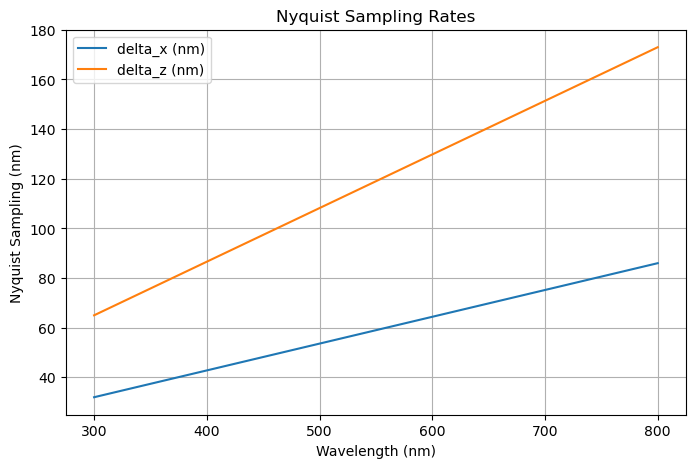

In [4]:
excitation_wavelengths = np.linspace(300, 800, 10)
nyquist_sampling_rates = [calculate_nyquist_sampling(w) for w in excitation_wavelengths]
df = pd.DataFrame(nyquist_sampling_rates, columns=["delta_x (nm)", "delta_z (nm)"])
df["wavelength (nm)"] = excitation_wavelengths
df = df[["wavelength (nm)", "delta_x (nm)", "delta_z (nm)"]]

plt.figure(figsize=(8, 5))
plt.plot(df["wavelength (nm)"], df["delta_x (nm)"], label="delta_x (nm)")
plt.plot(df["wavelength (nm)"], df["delta_z (nm)"], label="delta_z (nm)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Nyquist Sampling (nm)")
plt.title("Nyquist Sampling Rates")
plt.legend()
plt.grid()
plt.show()